In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
import ipyparallel as ipp
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
from IPython.display import display
from PIL import Image
import random
# Plot inline
%matplotlib inline
plt.rcParams['figure.figsize'] = [30/2.54, 20/2.54]
#c = ipp.Client()


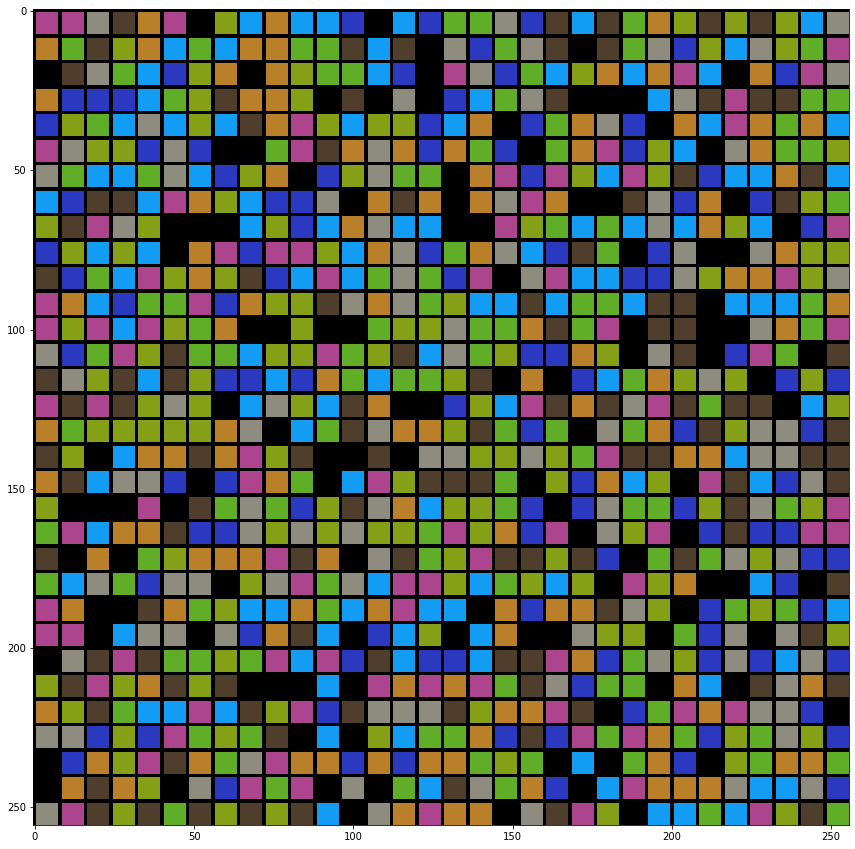

In [12]:
colors = [
    "#000",
    "#16a085",
    "#27ae60",
    "#2980b9",
    "#8e44ad",
    "#2c3e50",
    "#f39c12",
    "#c0392b",
    "#7f8c8d"
]
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))
def makeBoard(data):
    w = len(data[0])
    h = len(data)
    imgw = 256
    imgh = 256
    cellw = int(imgw / w)
    cellh = int(imgh / h)
    img = np.zeros((imgh,imgw,3), np.uint8)
    for y in range(h):
        for x in range(w):
            color = hex_to_rgb(colors[data[y][x]])
            cv.rectangle(img, (x*cellw, y*cellh), ((x+1)*cellw, (y+1)*cellh), color, -1)
            cv.rectangle(img, (x*cellw, y*cellh), ((x+1)*cellw, (y+1)*cellh), (0,0,0), 1)
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)
data = []
for i in range(32):
    line = []
    for j in range(32):
        line.append(random.randint(0,len(colors) - 1))
    data.append(line)

img = makeBoard(data)
#plt.imshow(img)

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111)
ax.imshow(img, interpolation='none')
#plt.xticks([]), plt.yticks([])

#display(Image.fromarray(i))